In [101]:
import seaborn as sb
import pandas as pd 

import math

In [102]:
titanic = sb.load_dataset("titanic")

In [103]:
titanic.shape

(891, 15)

In [104]:
titanic = titanic.dropna()

In [105]:
#Display female passengers 
titanic.loc[titanic["sex"] == "female"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [106]:
#display first class passengers
titanic.loc[titanic["class"] == "First"]



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


Text(0.5, 1.0, 'Passengers class')

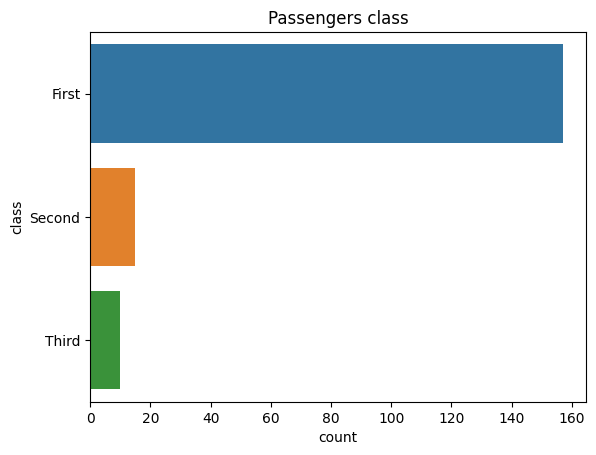

In [107]:

passengers_class = sb.countplot(data=titanic,y="class",hue="class")
passengers_class.set_title("Passengers class")

Text(0.5, 1.0, 'survivors of the titanic sinking')

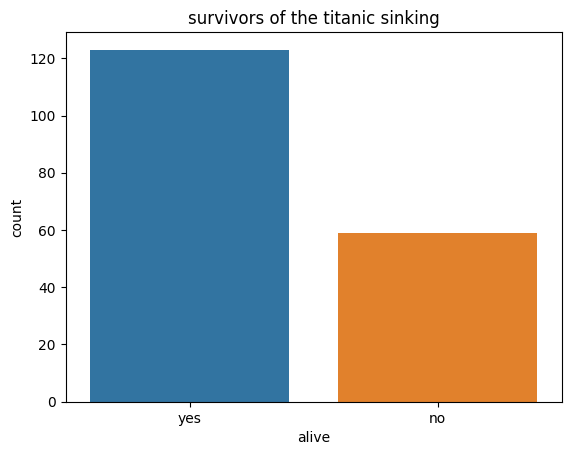

In [108]:
survivors = sb.countplot(data=titanic,x="alive",hue="alive")
survivors.set_title("survivors of the titanic sinking")



In [109]:
fare_total = titanic["fare"].sum()

fare_class = titanic.groupby("pclass")["fare"].sum()
print(fare_class)

pclass
1    13976.4501
2      276.6667
3      110.2750
Name: fare, dtype: float64


<Axes: xlabel='sex', ylabel='age'>

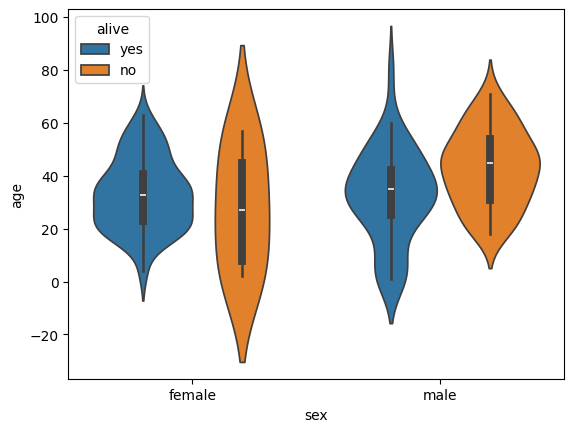

In [110]:
sb.violinplot(data=titanic,x="sex",y="age",hue="alive")

In [111]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


<Axes: xlabel='fare', ylabel='Count'>

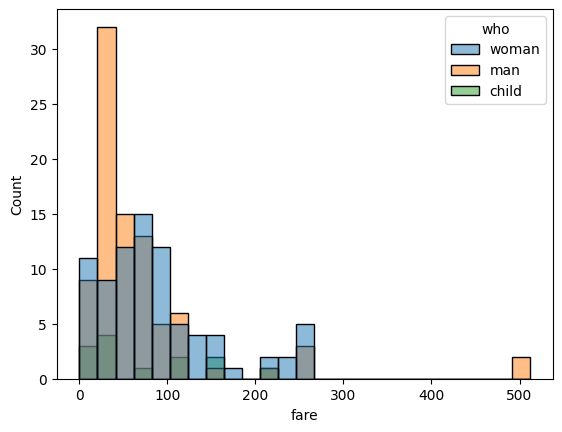

In [120]:
#Who paid more for a ticket?
sb.histplot(data=titanic,x="fare",hue="who")

In [113]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


Text(0.5, 1.0, 'accompanied passengers')

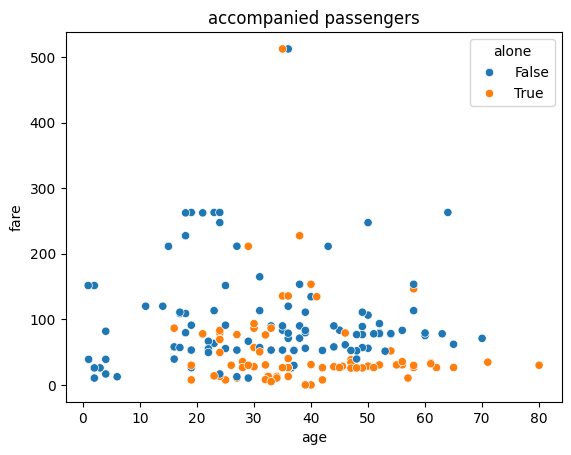

In [114]:
#How many passengers of all ages were accompanied and how much they paid?
scatter = sb.scatterplot(data=titanic,x="age",y="fare",hue="alone")
scatter.set_title("accompanied passengers")

In [115]:
#How many male adults were in the titanic crew?
adults = titanic["adult_male"]
adults_passengers = adults == True


classes_adults = titanic.groupby("pclass")["adult_male"].count()
print(classes_adults)


pclass
1    157
2     15
3     10
Name: adult_male, dtype: int64
